### Reciprocal sums of prime powers

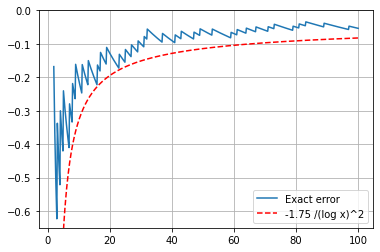

In [429]:
#Comparison of the lower bound of Proposition 1 with the exact error

def Error1(x):
    return N(sum([1./k for k in [1..x] if is_prime_power(k)]))-log(log(x*1.))-1.034653882

def Error2(x):
    return -N(1.75/(log(x))^2)

x=np.linspace(2,100,num=600)
y1=[]
y2=[]
for l in x:
    z1=Error1(l)
    y1.append(z1)
    z2=Error2(l)
    y2.append(z2)
plt.ylim(-.65,0)   
plt.plot(x,y1,label='Exact error')
plt.plot(x,y2,'--' ,color='red',label='-1.75 /(log x)^2')
plt.grid()
plt.legend()
plt.show()


In [401]:
# We check here the lower bound  holds for all prime-powers between 2 and 2278383.

P=2278421
minp=2
B2=1.03454778250106                                       # The prime-power constant given by Equation (1)
Max=0
Min=0
SS=N(sum([1./j for j in [2..minp] if is_prime_power(j)])) # The sum of reciprocal of prime-power 
for k in [minp+1..P]:
    EE=SS-log(log(k*1.))-B2                               # This is the quantity \varepsilon(x)
    Max=max(EE, Max)
    if is_prime_power(k+1):
        SS=SS+1./(k+1)
        ee=SS-log(log((k+1)*1.))-B2-1./(k+1)
        Min=min(ee, Min)
    else:
        ee=SS-log(log((k+1)*1.))-B2
        Min=min(ee, Min)
print([Max, Min])

[0, -0.861182042479341]


In [2]:
# We check here that the upper bound holds for all prime-powers between 2 and 2278383.

B2=1.03454778250106
minp=2
Sum=N(sum([1./j for j in [2..minp] if is_prime_power(j)]))
Max=0
Min=0
for k in [minp+1..2278383]:
    Eps=Sum-log(log(k*1.))-B2
    Max=max(Max,Eps) 
    Min=min(Min,Eps)
    if is_prime_power(k):
        Sum=Sum+1./k
print([Max, Min])

[0.0000843723609313951, -0.628595610117759]


### A lower estimate of the integral $I$

Let $\zeta_{Q(\sqrt{-d})}(s)$ be the Dedekind zeta function of the quadratic fields $Q(\sqrt{-d})$. We define the integral $I$ as follows
$$
I = \frac{1}{2i\pi} \int_{2-i\infty}^{2+i\infty}\zeta_{-d}(s+\beta)\frac{x^s}{s(s+2)(s+3)}ds.
$$
By shifting the path integral to $\textrm{Re}(s)=-\beta$, we obtain
$$
I= \frac{L(1,\chi)\, x^{1-\beta}}{(1-\beta)(3-\beta)(4-\beta)} + J,
$$
where 
$$
J=\frac{1}{2i\pi}\int_{-\beta-i\infty}^{-\beta+i\infty}\zeta(s+\beta)L(s+\beta,\chi)\frac{x^s}{s(s+2)(s+3)}ds.
$$
It is clear that in order to estimate $I$, we need to take care of the integral $J$. This is done in the manuscript by means of Lemma 1.4.3. Using the assumption (1.4.1) on the quantity $1-\beta$, we get

In [3]:
assump=CBF((1-6.045/sqrt(300000000)))
assump2=CBF((1-6.045/sqrt(300000000))^2)
print('beta >',assump)
print('beta^2 >', assump2)

beta > [0.999650991762275 +/- 3.24e-16]
beta^2 > [0.999302105331299 +/- 8.18e-16]


In case we only want to consider the constants in the above cell, we use the suffix $\texttt{.mid()}$ to access on it. 

We recall the following bound of the integral $J$:
\begin{equation}
|J|\leq \frac{x^{-\beta}}{2\pi}\int_{-\infty}^{\infty}\frac{|\zeta(it)L(it,\chi)|}{\sqrt{(0.99930\ldots+t^2)(1+t^2)(4+t^2)}}dt.
\end{equation}

Here is the place where we utilize results on $|\zeta(1+it)|$ and $|L(it,\chi)|$ given by Patel and Dudek respectively. To estimate $J$ as above, we write 
$$
|J|\leq \frac{x^{-\beta}}{2\pi}\sqrt{d}\left((J_1+J_3)\log d+J_3+J_4\right),
$$
so that we need to separetely evaluate the integrals $J_i$'s.

$$
J_1=\frac{1}{\pi}\int^{-3}_{3}\frac{|t\zeta(1-it)|}{\sqrt{(0.99930\ldots+t^2)(1+t^2)(4+t^2)}}dt
$$

In [7]:
#We take the center of the complex ball on the square of the lower bound of \beta
c=assump2.mid()

#J1 using complex ball fields
J1=CBF(integral(abs(x*zeta(1-I*x))/sqrt((c+x^2)*(1+x^2)*(4+x^2)), x,-3,3)/(2*pi))
J1

[0.1969044276262722 +/- 8.23e-17]

$$
J_2=\frac{1}{2\pi}\int^{-3}_{3}\frac{|t\zeta(1-it)|\log(e(|t|+\tfrac{14}{5}))}{\sqrt{(0.99930\ldots+t^2)(1+t^2)(4+t^2)}}dt
$$

In [8]:
#J2 using complex ball fields

J2=CBF(integral(abs(x*zeta(1-I*x)*log(e*(abs(x)+14/5)))/sqrt((c+x^2)*(1+x^2)*(4+x^2)), x,-3,3)/(2*pi))
J2

[0.451998584922338 +/- 2.98e-16]

$$
J_3=\frac{0.8}{2\pi}\int_{3}^{\infty}\frac{t\log(t)}{\sqrt{(0.99930\ldots+t^2)(1+t^2)(4+t^2)}}dt
$$

In [9]:
#J3 using complex ball fields

J3=CBF(integral(x*log(x)/sqrt((c+x^2)*(1+x^2)*(4+x^2)), x,3,Infinity)*(0.8/sqrt(2*pi)))
J3

[0.208819279044738 +/- 6.19e-16]

$$
J_4=\frac{0.8}{2\pi}\int_{3}^{\infty}\frac{t\log(t)\log\left(e(t+\tfrac{14}{5})\right)}{\sqrt{(0.99930\ldots+t^2)(1+t^2)(4+t^2)}}dt
$$

In [11]:
#J4 using complex ball fields

J4=CBF(integral((x*log(x)*log(e*(x+14/5)))/sqrt((c+x^2)*(1+x^2)*(4+x^2)), x,3,Infinity)*(0.8/sqrt(2*pi)))
J4

[0.81813415773022 +/- 5.11e-15]

In [263]:
#The coefficients in (1.4.13)
J1J3=J1+J3
J2J4=J2+J4
print('J1+J3 is equal to',J1J3)
print('J2+J4 is equal to',J2J4)

J1+J3 is equal to [0.405723706671010 +/- 5.01e-16]
J2+J4 is equal to [1.27013274265256 +/- 3.52e-15]


In [264]:
#The constant terms in the upper bound of J
upperJ=CBF((J1J3+J2J4/log(300000000))/(2*pi)); upperJ

[0.074929246251142 +/- 1.51e-16]

In [271]:
upperJ2=CBF(2*upperJ); upperJ2

[0.149858492502284 +/- 3.02e-16]

### Finding the upper bound

$\textbf{Case 1}$

In [4]:
p_b=CBF(pi/((3-assump)*(4-assump))); p_b

[0.52344652568052 +/- 1.06e-15]

In [277]:
t1=CBF((396*p_b)/pi^2); t1

[21.0023437359462 +/- 9.38e-14]

In [278]:
t2=CBF((396*upperJ2.mid()*6.045)/(pi^2*101)); t2

[0.359875044394500 +/- 5.80e-16]

In [283]:
t22=CBF((396*2*upperJ.mid()*6.045)/(pi^2*101*16)); t22

[0.0224921902746563 +/- 4.90e-17]

In [450]:
CBF(t1.mid()-39*t2.mid())

[6.967217004560640 +/- 3.63e-16]

 $\textbf{Case 2}$

In [439]:
#We here numerically estimate the right hand side terms in (1.4.26)

#declaring variables
var('fd,ld,logd,C')

#defining the function k_0
K0(logd,ld)=ceil(.5*(logd-log(4.))/log(ld*1.))

#defining the sigma function
def Sigma(ld):
    return CBF(2*sum([1./k for k in [1..ld] if is_prime_power(k)]))

#first error in Er(d,l(d))
def Err0(ld):
    return CBF(3.6/log(ld)^2)

#second error in Er(d,l(d)) (checking condition)
def Err1(logd,ld):
    s=Sigma(ld).mid()
    k=K0(logd,ld)
    if s>k:
        return -1
    else:    
        return CBF(s^k/(factorial(k))*(1+k)/(1+k-s)*11/101)


#defining the function to be optimized
def OptF(C,logd,fd,ld):
    #checking conditions
    if Err1(logd,ld).mid()<0 or fd>ld or fd<1:
        return -1
    else:
        return CBF((21.002-0.059*C*logd/fd)/(1+2*log(1+log(fd)/log(ld))+Err0(ld)+Err1(logd,ld)))
    

In [244]:
OptF(6.045,41,16,16)

[6.58390131368521 +/- 7.04e-15]

In [245]:
print('k0=',K0(16,16),'Sigma=', Sigma(16),'exposigma=',CBF(e*Sigma(16)))

k0= 3 Sigma= [3.785267510267510 +/- 2.62e-16] exposigma= [10.28942388901658 +/- 5.82e-15]


In [246]:
print(Err0(16), Err1(16,16))

[0.468308020726262 +/- 8.15e-16] -1


In [288]:
CBF(1+2*log(2))+Err0(16)

[2.85460238184615 +/- 3.50e-15]

In [285]:
CBF(11/(101*sqrt(2*pi)))

[0.0434491592516412 +/- 6.73e-17]

In [330]:
def plot_case2(t):
    k=K0(t,16)
    D2=0.04344*(1+k)/(1+k-3.78526)*(10.28942/k)^k/sqrt(k)
    return N((21.00234-0.02249*t)/(2.85460+D2))

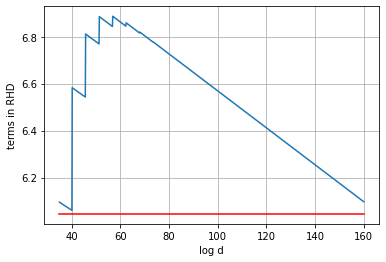

In [333]:
Num=1000
x=np.linspace(35,160,num=Num)
y=[]
for t in x:
    z=plot_case2(t)
    y.append(z)
w=6.045*np.ones(Num)
plt.plot(x,y)
plt.plot(x,w,'-',color='red')
plt.ylabel('terms in RHD')
plt.xlabel('log d')
plt.grid()
plt.show()

$\textbf{Case 3}$

In [336]:
lowert=CBF(.25*(160-log(4.))); lowert

[39.65342640972003 +/- 3.59e-15]

In [339]:
CBF((2*lowert)/log(lowert))

[21.54973661476796 +/- 7.62e-15]

In [358]:
err=CBF(2*(1.03465+min(0.2/(log(39))^3,0.0001))); err

[2.069500000000000 +/- 1.18e-16]

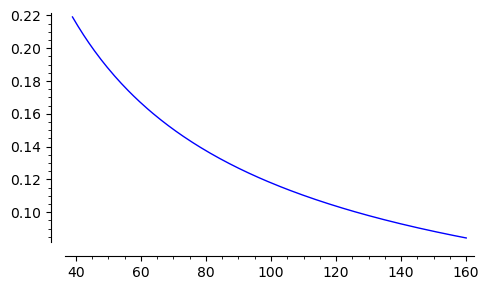

In [445]:
var('t')
plot(log(t)*(log(log(t))+1.034)/t, (t, 39, 160), figsize=[5,3])

In [363]:
upperesk0=CBF((e*log(lowert)*(2*log(log(lowert))+err))/(2*lowert)); upperesk0

[0.58975729501161 +/- 4.00e-15]

In [365]:
upks=CBF(1/(1-(upperesk0/e))); upks

[1.27707328985136 +/- 1.72e-15]

In [366]:
CBF((11/101)*(upks/sqrt(2*pi*22)*upperesk0^22))

[1.0661024311415e-7 +/- 2.91e-21]

In [373]:
denom=CBF(1+2*log(2)+3.6/(log(lowert.mid()))^2); denom

[2.652100497030378 +/- 7.84e-16]

In [372]:
print(t1,'and',t2)

[21.0023437359462 +/- 9.38e-14] and [0.359875044394500 +/- 5.80e-16]


In [375]:
print(CBF(t1/denom),'and',CBF(t2/denom))

[7.9191357037424 +/- 5.11e-14] and [0.135694346725345 +/- 2.81e-16]


In [385]:
CBF((t1/denom)-(t2/denom)*(CBF(4)*lowert+CBF(log(4)))/lowert)

[7.3716144062957 +/- 3.92e-14]